In [37]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import precision_score,f1_score,recall_score,confusion_matrix, roc_curve
import matplotlib.pyplot as plt

In [38]:
data = datasets.load_breast_cancer()

In [39]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [40]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [41]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [42]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [43]:
data.data.shape

(569, 30)

In [44]:
x,y = data.data, data.target

In [45]:
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [46]:
GBC = GradientBoostingClassifier()

In [47]:
GBC.fit(x_train,y_train)

GradientBoostingClassifier()

In [48]:
predictions = GBC.predict(x_test)


In [49]:
predictions[0:10]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [50]:
y_test[0:10]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [51]:
confusion_matrix(y_test, predictions)

array([[45,  2],
       [ 2, 65]], dtype=int64)

In [52]:
GBC.score(x_test,y_test)

0.9649122807017544

In [53]:
precision_score(y_test, predictions)

0.9701492537313433

In [54]:
f1_score(y_test,predictions)

0.9701492537313433

In [55]:
y_pred_prob = GBC.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob)

Text(0, 0.5, 'true positive rate')

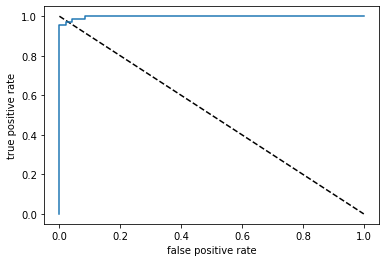

In [56]:
plt.plot([0,1],[1,0], 'k--')
plt.plot(fpr,tpr,label = 'GradientBoostingClassifier')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')


In [57]:
AdaB = AdaBoostClassifier()

In [58]:
AdaB.fit(x_train,y_train)

AdaBoostClassifier()

In [59]:
predictions = AdaB.predict(x_test)

In [60]:
predictions[0:10]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [61]:
y_test[0:10]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [62]:
AdaB.score(x_test,y_test)

0.956140350877193

In [66]:
confusion_matrix(y_test, predictions)

array([[44,  3],
       [ 2, 65]], dtype=int64)

In [67]:
precision_score(y_test, predictions)

0.9558823529411765

In [68]:
f1_score(y_test,predictions)

0.962962962962963

In [ ]:
#receiver operator curve roc